
Mandatory:Before starting with Implementation set the Runtime to GPU intead of CPU for faster processing

**Faster way to upload any large files instead of downloading in local files by using Kaggle API key**

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Copy Paste the Command API of the required dataset**

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 163MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


**Extracting the folder**

In [7]:
import zipfile
zip=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip.extractall('/content')
zip.close()

**Importing required Modules**

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.12.0'

In [5]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dogs_vs_cats/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,MaxPooling2D

In [8]:
from tensorflow.keras.regularizers import l2 #This overall module is required for svm classification

In [9]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

#Creating 4 filter layers
cnn.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(64,64,3)))#input_shape=(height,width,rgb=3)
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu")) #No need to add input_shape=(64,64,3) as it will get referred from 1st filter
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

cnn.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 5 - Output Layer
#cnn.add(Dense(1,activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [11]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
625/625 [==============================] - 67s 100ms/step - loss: 0.8119 - accuracy: 0.6165 - val_loss: 0.6201 - val_accuracy: 0.7054
Epoch 2/15
625/625 [==============================] - 58s 92ms/step - loss: 0.6144 - accuracy: 0.7135 - val_loss: 0.5421 - val_accuracy: 0.7666
Epoch 3/15
625/625 [==============================] - 58s 93ms/step - loss: 0.5389 - accuracy: 0.7507 - val_loss: 0.4762 - val_accuracy: 0.7946
Epoch 4/15
625/625 [==============================] - 57s 90ms/step - loss: 0.4823 - accuracy: 0.7776 - val_loss: 0.4269 - val_accuracy: 0.8060
Epoch 5/15
625/625 [==============================] - 59s 94ms/step - loss: 0.4410 - accuracy: 0.7976 - val_loss: 0.4086 - val_accuracy: 0.8150
Epoch 6/15
625/625 [==============================] - 59s 94ms/step - loss: 0.4180 - accuracy: 0.8103 - val_loss: 0.3832 - val_accuracy: 0.8368
Epoch 7/15
625/625 [==============================] - 57s 91ms/step - loss: 0.3958 - accuracy: 0.8205 - val_loss: 0.4916 - val_accuracy

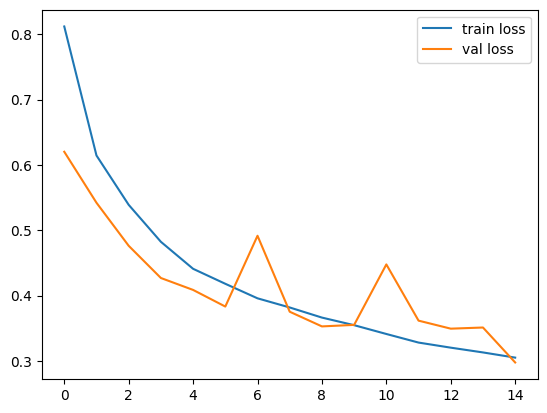

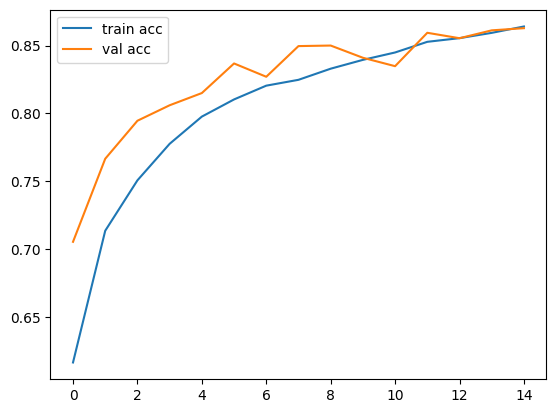

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

1/1 [==============================] - 0s 27ms/step
The image classified is dog


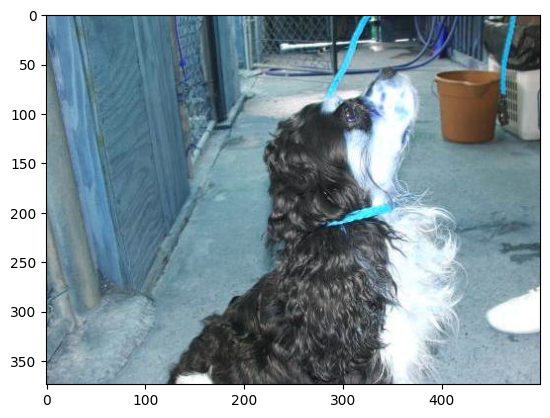

In [17]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
test_img= cv2.imread("/content/dogs_vs_cats/test/dogs/dog.10017.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(64,64))
test_image = image.load_img('/content/dogs_vs_cats/test/dogs/dog.10017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

1/1 [==============================] - 0s 32ms/step
The image classified is cat


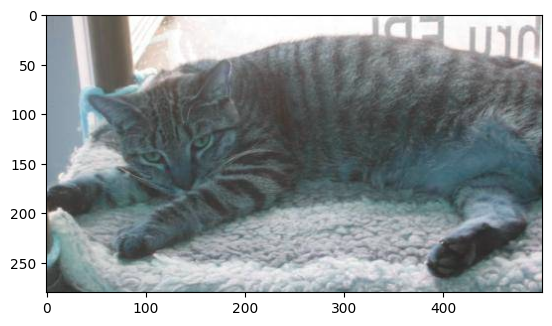

In [18]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
test_img= cv2.imread("/content/dogs_vs_cats/test/cats/cat.10017.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(64,64))
test_image = image.load_img('/content/dogs_vs_cats/test/cats/cat.10017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")